# Sherifat Shitu-Ross

## Linear Regression and Correlation analysis

In [2]:
#import libraries
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
#read the data into dataframe
df_insurance=pd.read_csv("insurance.csv")

In [4]:
#view first 5 rows
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#view the statistics of the dataframe
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#filtering dataframe by smokers
df_smoker=df_insurance.loc[df_insurance['smoker']== "yes"]

In [11]:
df_smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [12]:
#filtering dataframe by nonsmokers
df_nonsmoker=df_insurance.loc[df_insurance['smoker']== "no"]

In [13]:
df_nonsmoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [17]:
stats.ttest_ind(df_smoker['charges'], df_nonsmoker['charges'])

Ttest_indResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283)

In [23]:
#normalising the categorical column 'smoker'
df_insurance1=pd.get_dummies(df_insurance, columns =["smoker"]).head()

<AxesSubplot:xlabel='smoker_no', ylabel='charges'>

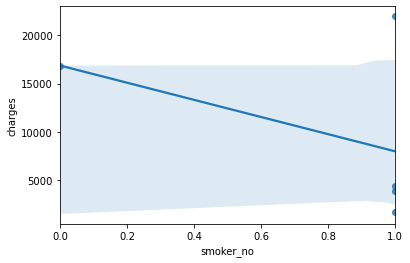

In [68]:
#ploting the linear regression for nonsmokers and charges
sns.regplot(x="smoker_no", y= "charges", data=df_insurance1)

<AxesSubplot:xlabel='smoker_yes', ylabel='charges'>

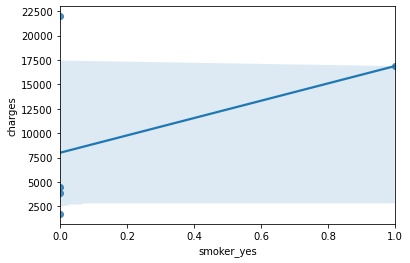

In [69]:
#ploting the linear regression for smokers and charges
sns.regplot(x="smoker_yes", y= "charges", data=df_insurance1)

In [29]:
#check the pearson correlation coefficient and p_values for charges in relation to nonsmokers
pearson_coef, p_value = stats.pearsonr(df_insurance1['smoker_no'], df_insurance1['charges'])

In [30]:
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.43868189997398355  with a P-value of P = 0.4599239080442116


In [31]:
#check the pearson correlation coefficient and p_values for charges in relation to smokers
pearson_coef, p_value = stats.pearsonr(df_insurance1['smoker_yes'], df_insurance1['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.43868189997398355  with a P-value of P = 0.4599239080442116


In [24]:
#checking for all correlation
df_insurance1.corr()

,age,bmi,children,charges,smoker_no,smoker_yes
age,1.000000,-0.531345,-0.053963,0.209860,0.550652,-0.550652
bmi,-0.531345,1.000000,0.678984,-0.891364,0.169630,-0.169630
children,-0.053963,0.678984,1.000000,-0.509595,0.342997,-0.342997
charges,0.209860,-0.891364,-0.509595,1.000000,-0.438682,0.438682
smoker_no,0.550652,0.169630,0.342997,-0.438682,1.000000,-1.000000
smoker_yes,-0.550652,-0.169630,-0.342997,0.438682,-1.000000,1.000000


<AxesSubplot:>

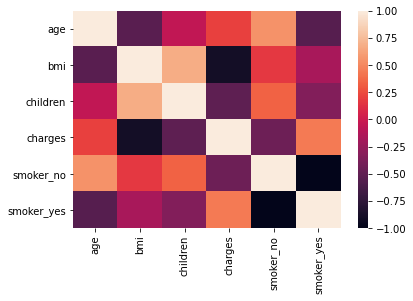

In [55]:
#viewing the heatmap for correlation
sns.heatmap(df_insurance1.corr())

<AxesSubplot:xlabel='bmi', ylabel='charges'>

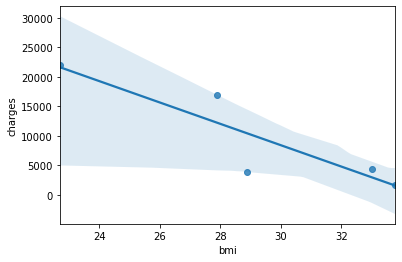

In [25]:
#ploting the linear regression for bmi and charges
sns.regplot(x="bmi", y= "charges", data=df_insurance1)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [45]:
#Linear regression and R^2 model score
lm = LinearRegression()
x=df_insurance1[['bmi']]
lm.fit(x, df_insurance1['charges'])
lm.score(x, df_insurance1['charges'])

0.7945292646221136

In [35]:
#selecting more features
features=df_insurance1[['bmi', 'age', 'children']]

In [43]:
#multiple regression and R^2 model score
lm2 = LinearRegression()
lm2.fit(features, df_insurance1['charges'])
lm2.score(features, df_insurance1['charges'])


0.9979509181412598

In [46]:
pearson_coef, p_value = stats.pearsonr(df_insurance1['bmi'], df_insurance1['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.891363710626652  with a P-value of P = 0.04227558453988623


Comments and findings

1) Nonsmoker has slight negative correlation with charges while smokers also have slight positive correlation with charges

2) Since the p-value is  >  0.05 at 0.4599, the correlation between smokers, non smokers and charges are not statistically significant, and the linear relation is not strong at -0.43868

3) BMI has a good negative correlation with Charges (-0.89137)

4) Since the p-value is  <  0.05, the correlation between bmi and charge is statistically significant, and the linear relationship is quite strong (~0.89137, close to 1)

5) The R^2 score for single independent variable BMI predicting charges is 079453

6) The R^2 score significantly increases to 0.99795 when other independent varaible like age and children are brought into the model.
